## Homework 2
*For any questions or concerns please email your instructor at `smanna@scu.edu`*
### Due - 02/07/2020 - 11:59p - 20 points

**Name:** `<Jeffrey Lin>`

**Email** `<jlin7@scu.edu>`

**Objectives:** The main aim of this homework is to make you analyze real-life data through `Exploratory Data Analysis`.

**Problem Statement** - In this homework we have used data from [THE STANFORD OPEN POLICING PROJECT](https://openpolicing.stanford.edu/) as our dataset for the city SFO (`sfo.csv`). This dataset is very close to the one we have used in class. Your task is to understand the dataset and answer the questions with respect to the dataset.

*NOTE* - Solutions might exist on web, but you are NOT allowed to replicate them. Please feel free to use the *w4-EDA-policingData-Vermont.ipynb* as a reference to work on this homework.

**Submission Instructions:** 
* Please download `HW2.ipynb`, and `sfo.csv` files and insert cells in the `HW2.ipynb` to complete your homework and submit the same file to Camino under `Homework` $\rightarrow$ `HW2`.

**Honor Code:** You are expected to complete the homework on your own. Solutions might exist elsewhere, but you are not allowed to copy them. 

### You have to write two common function, that coude be used by both the datasets for analysis. 

In [15]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
figsize = (16,8)


## Analysis of SFO dataset

### Question 1 (3 pts)

In [16]:
# load the dataset sfo.csv
sfo = pd.read_csv("sfo.csv")

In [17]:
# view few rows of the dataset
sfo.head()

,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,...,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop,raw_search_vehicle_description,raw_result_of_contact_description
0,869921,2014-08-01,00:01:00,MASONIC AV & FELL ST,37.773004,-122.445873,NaN,NaN,asian/pacific islander,female,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
1,869922,2014-08-01,00:01:00,GEARY&10TH AV,37.780898,-122.468586,NaN,NaN,black,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
2,869923,2014-08-01,00:15:00,SUTTER N OCTAVIA ST,37.786919,-122.426718,NaN,NaN,hispanic,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
3,869924,2014-08-01,00:18:00,3RD ST & DAVIDSON,37.746380,-122.392005,NaN,NaN,hispanic,male,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
4,869925,2014-08-01,00:19:00,DIVISADERO ST. & BUSH ST.,37.786348,-122.440003,NaN,NaN,white,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation


In [18]:
# view the columns
sfo.columns.tolist()

['raw_row_number',
 'date',
 'time',
 'location',
 'lat',
 'lng',
 'district',
 'subject_age',
 'subject_race',
 'subject_sex',
 'type',
 'arrest_made',
 'citation_issued',
 'warning_issued',
 'outcome',
 'contraband_found',
 'search_conducted',
 'search_vehicle',
 'search_basis',
 'reason_for_stop',
 'raw_search_vehicle_description',
 'raw_result_of_contact_description']

### Question 2 (7 pts)
**NOTE**: Before answering the questions below, please make sure each column has the exact same number of entries. Please feel free to look at the sample code shown in class to get on this component. Make sure you show these steps by inserting additional cells in the space below.

In [19]:
#Seeing column count
sfo.count()

raw_row_number                       905070
date                                 905070
time                                 905035
location                             905027
lat                                  903373
lng                                  903373
district                             852883
subject_age                          846182
subject_race                         905070
subject_sex                          905070
type                                 905070
arrest_made                          905070
citation_issued                      905070
warning_issued                       905070
outcome                              889389
contraband_found                      53381
search_conducted                     905070
search_vehicle                       905070
search_basis                          53381
reason_for_stop                      902858
raw_search_vehicle_description       905070
raw_result_of_contact_description    905070
dtype: int64

In [20]:
# Processing steps
#we see that search_basis has the lowest amount of tuples so we fillna on search_basis
sfo['search_basis'].fillna('N/A', inplace = True)
sfo.dropna(inplace = True)

In [34]:
#we now check dataset to determine how consistently populated the data is
sfo.count()

raw_row_number                       41075
date                                 41075
time                                 41075
location                             41075
lat                                  41075
lng                                  41075
district                             41075
subject_age                          41075
subject_race                         41075
subject_sex                          41075
type                                 41075
arrest_made                          41075
citation_issued                      41075
warning_issued                       41075
outcome                              41075
contraband_found                     41075
search_conducted                     41075
search_vehicle                       41075
search_basis                         41075
reason_for_stop                      41075
raw_search_vehicle_description       41075
raw_result_of_contact_description    41075
dtype: int64

In [23]:
## list of all locations, with how many traffic stops occurred
sfo['location'].value_counts()

16TH/MISSION                        33
TURK/TAYLOR                         30
TURK ST & TAYLOR ST                 25
NEWCOMB/NEWHALL                     23
15TH/MISSION                        21
TURK & TAYLOR                       20
KEITH & THOMAS                      18
BAYSHORE/OAKDALE                    18
EDDY/MASON                          18
3RD/JERROLD                         17
TAYLOR/TURK                         17
3RD/QUESADA                         17
FITZGERALD/JENNINGS                 16
3RD/MCKINNON                        16
EDDY/TAYLOR                         16
19TH ST & CAPP ST                   15
3RD & REVERE                        15
18TH/MISSION                        15
3RD/NEWCOMB                         15
3RD/REVERE                          15
3350 MISSION ST                     15
PALOU & NEWHALL                     15
TURK/LEAVENWORTH                    14
3RD & NEWCOMB                       14
OAKDALE/NEWHALL                     14
3RD/PALOU                

In [29]:
# Show the distribution of citation issued
sfo['citation_issued'].value_counts()

True     22459
False    18616
Name: citation_issued, dtype: int64

In [31]:
# Show the distribution of stop outcomes
sfo['outcome'].value_counts()

citation    22453
warning     12073
arrest       6549
Name: outcome, dtype: int64

In [32]:
# Show the distribution of stops by race
sfo['subject_race'].value_counts()

black                     18993
white                      9248
hispanic                   7760
other                      2740
asian/pacific islander     2334
Name: subject_race, dtype: int64

In [ ]:
# Show the distribution of stops by gender
sfo['subject_sex'].value_counts()

### Question 3 (5 pts)
Generate Kernel Density Estimate plot using Gaussian kernels.

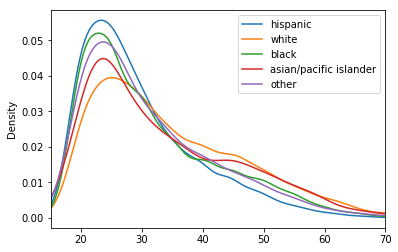

In [33]:
# plot police stop frequency by race and age
fig, ax = plt.subplots()
ax.set_xlim(15, 70)
for race in sfo['subject_race'].unique(): # Return unique values of Series object.
    s = sfo[sfo['subject_race'] == race]['subject_age']
    s.plot.kde(ax=ax, label=race) # Generate Kernel Density Estimate plot using Gaussian kernels.
ax.legend()

**What can you conclude from the figure. Explain.**


Observation: We can see that young adult drivers in their early to mid twenties are the likelist to be pulled over. There is a sharp decline in stop rate from the mid twenties to early thirties. At their peak, around age 23, hipanic and black drivers are the most likely race to be pulled over while white drivers are the least likely. However most interestingly, at the ages of 40-70 white and asians drivers are the most likely to be pulled over. 

### Question 4 (5)

In [39]:
def compute_outcome_stats(df):
#Compute statistics regarding the relative quanties of arrests, warnings, and citations"
    n_total = len(df)
    n_warnings = len(df[df['outcome'] == 'warning'])
    n_citations = len(df[df['outcome'] == 'citation'])
    n_arrests = len(df[df['outcome'] == 'arrest'])
    citations_per_warning = 1.0 * n_citations / n_warnings
    arrest_rate = 1.0 * n_arrests / n_total

#the function should return
    return(pd.Series(data = {
        'n_total': n_total,
        'n_warnings': n_warnings,
        'n_citations': n_citations,
        'n_arrests': n_arrests,
        'citations_per_warning': citations_per_warning,
        'arrest_rate': arrest_rate
    }))

In [40]:
# call this function on the dataframe to see the results
compute_outcome_stats(sfo)

arrest_rate                  0.15944
citations_per_warning        1.85977
n_arrests                 6549.00000
n_citations              22453.00000
n_total                  41075.00000
n_warnings               12073.00000
dtype: float64

### Optional Question (EC 2pts) 

In [ ]:
# Show one specific illustration of your choice that might bring out any kind of dusparities 
# exist in the dataset
# you have to explore this aspect on your own.
# You are recommended to use a bar or scatter plot to answer this question.

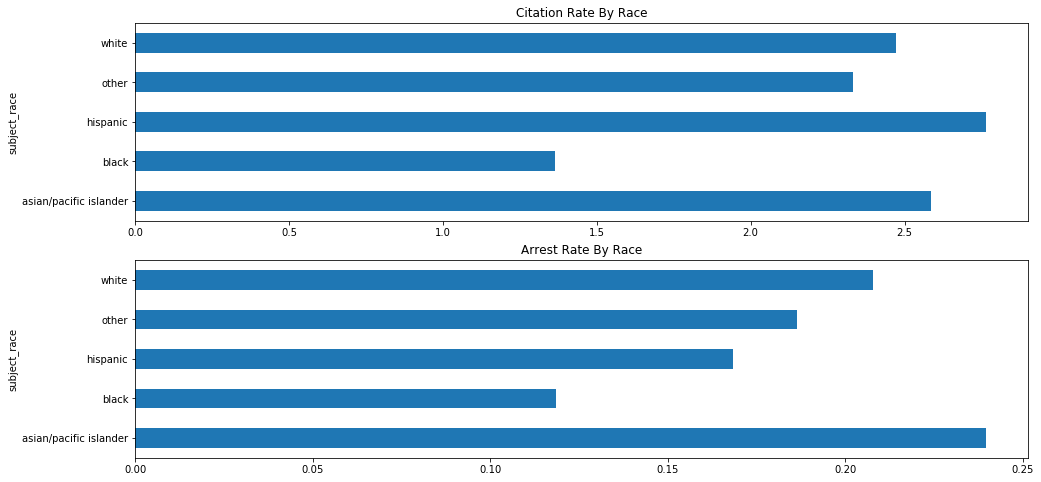

In [41]:
race_agg = sfo.groupby(['subject_race']).apply(compute_outcome_stats)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=figsize)
race_agg['citations_per_warning'].plot.barh(ax=axes[0], figsize=figsize, title="Citation Rate By Race")
race_agg['arrest_rate'].plot.barh(ax=axes[1], figsize=figsize, title='Arrest Rate By Race')